In [ ]:
                                               #Auto Insurance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn.cluster import	KMeans

In [3]:
at = pd.read_csv("AutoInsurance (1).csv")

print(at.describe())

at.info()

       Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000              

In [4]:
#we have to dro the unnecessary columns
at.drop(at.columns[[0,1,2,3,6,8,10,11,19,22,23]],axis=1 , inplace=True)
at

,Coverage,Education,EmploymentStatus,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Sales Channel,Total Claim Amount
0,Basic,Bachelor,Employed,56274,69,32,5,0,1,Corporate Auto,Corporate L3,Agent,384.811147
1,Extended,Bachelor,Unemployed,0,94,13,42,0,8,Personal Auto,Personal L3,Agent,1131.464935
2,Premium,Bachelor,Employed,48767,108,18,38,0,2,Personal Auto,Personal L3,Agent,566.472247
3,Basic,Bachelor,Unemployed,0,106,18,65,0,7,Corporate Auto,Corporate L2,Call Center,529.881344
4,Basic,Bachelor,Employed,43836,73,12,44,0,1,Personal Auto,Personal L1,Agent,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,Basic,Bachelor,Employed,71941,73,18,89,0,2,Personal Auto,Personal L1,Web,198.234764
9130,Extended,College,Employed,21604,79,14,28,0,1,Corporate Auto,Corporate L3,Branch,379.200000
9131,Extended,Bachelor,Unemployed,0,85,9,37,3,2,Corporate Auto,Corporate L2,Branch,790.784983
9132,Extended,College,Employed,21941,96,34,3,0,3,Personal Auto,Personal L2,Branch,691.200000


In [5]:
#now we have standardize the numerical columns.
def norm_fnc(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

std_at = norm_fnc(at.iloc[ : , [3,4,5,6,7,8,12]])
std_at.describe()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,0.376645,0.135946,0.431343,0.485501,0.076878,0.245771,0.150006
std,0.303857,0.145181,0.287807,0.281879,0.182077,0.298773,0.100410
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029536,0.171429,0.242424,0.000000,0.000000,0.094071
50%,0.338959,0.092827,0.400000,0.484848,0.000000,0.125000,0.132675
75%,0.623318,0.202532,0.657143,0.717172,0.000000,0.375000,0.189212
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#Now we have to create dummy variable for categorical columns.

at_dummy = pd.get_dummies(at)

at_new = pd.concat([std_at , at_dummy], axis = 1)

at_new.describe()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,...,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,...,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,0.376645,0.135946,0.431343,0.485501,0.076878,0.245771,0.150006,37657.380009,93.219291,15.097000,...,0.135757,0.232319,0.375082,0.007226,0.017955,0.016203,0.380666,0.281038,0.193234,0.145062
std,0.303857,0.145181,0.287807,0.281879,0.182077,0.298773,0.100410,30379.904734,34.407967,10.073257,...,0.342549,0.422334,0.484171,0.084701,0.132795,0.126263,0.485577,0.449531,0.394857,0.352183
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029536,0.171429,0.242424,0.000000,0.000000,0.094071,0.000000,68.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.338959,0.092827,0.400000,0.484848,0.000000,0.125000,0.132675,33889.500000,83.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.623318,0.202532,0.657143,0.717172,0.000000,0.375000,0.189212,62320.000000,109.000000,23.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99981.000000,298.000000,35.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(at_new)
    TWSS.append(kmeans.inertia_)
    
TWSS

[2147271490236.3162,
 925910159104.8424,
 435742357343.7073,
 259643150452.9801,
 168453396966.80365,
 124430510762.32397,
 92291504475.51764]

Text(0, 0.5, 'total_within_SS')

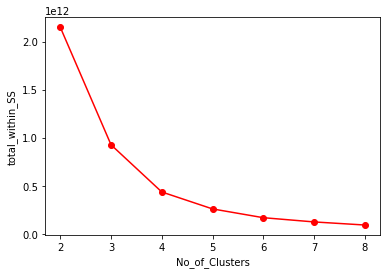

In [8]:
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [27]:

# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 5)
model.fit(at_new)

model.labels_ # getting the labels of clusters assigned to each row 



array([2, 4, 3, ..., 4, 0, 4])

In [28]:
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object  
at['category'] = mb # creating a  new column and assigning it to new column 
at.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Policy Type                    9134 non-null   object 
 1   Sales Channel                  9134 non-null   object 
 2   Policy                         9134 non-null   object 
 3   Total Claim Amount             9134 non-null   float64
 4   category                       9134 non-null   int32  
 5   Coverage                       9134 non-null   object 
 6   Education                      9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Monthly Premium Auto           9134 non-null   int64  
 10  Months Since Last Claim        9134 non-null   int64  
 11  Months Since Policy Inception  9134 non-null   int64  
 12  Number of Open Complaints      9134 non-null   i

In [29]:


at_final = at.iloc[:,[4,0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
at_final



,category,Policy Type,Sales Channel,Policy,Total Claim Amount,category,Coverage,Education,EmploymentStatus,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2,Corporate Auto,Agent,Corporate L3,384.811147,2,Basic,Bachelor,Employed,56274,69,32,5,0,1
1,4,Personal Auto,Agent,Personal L3,1131.464935,4,Extended,Bachelor,Unemployed,0,94,13,42,0,8
2,3,Personal Auto,Agent,Personal L3,566.472247,3,Premium,Bachelor,Employed,48767,108,18,38,0,2
3,4,Corporate Auto,Call Center,Corporate L2,529.881344,4,Basic,Bachelor,Unemployed,0,106,18,65,0,7
4,3,Personal Auto,Agent,Personal L1,138.130879,3,Basic,Bachelor,Employed,43836,73,12,44,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2,Personal Auto,Web,Personal L1,198.234764,2,Basic,Bachelor,Employed,71941,73,18,89,0,2
9130,0,Corporate Auto,Branch,Corporate L3,379.200000,0,Extended,College,Employed,21604,79,14,28,0,1
9131,4,Corporate Auto,Branch,Corporate L2,790.784983,4,Extended,Bachelor,Unemployed,0,85,9,37,3,2
9132,0,Personal Auto,Branch,Personal L2,691.200000,0,Extended,College,Employed,21941,96,34,3,0,3


In [33]:
at.iloc[:,8: ].groupby(at.category).mean()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
category,,,,,,
0,24479.702098,92.512354,15.254079,47.537995,0.361305,2.944522
1,87358.119625,91.160281,14.075059,48.539484,0.378421,2.929633
2,64833.446911,94.132573,15.514697,48.350930,0.386923,2.938212
3,43621.339740,94.127712,14.858648,47.450093,0.412895,2.992560
4,528.368724,93.697531,15.367901,48.490947,0.387243,3.006173
